In [236]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from catboost import CatBoostClassifier

In [259]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')


--- First few rows of train data ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1



--- First few rows of test data ---


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown



--- Train data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


None


--- Test data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         250000 non-null  int64 
 1   age        250000 non-null  int64 
 2   job        250000 non-null  object
 3   marital    250000 non-null  object
 4   education  250000 non-null  object
 5   default    250000 non-null  object
 6   balance    250000 non-null  int64 
 7   housing    250000 non-null  object
 8   loan       250000 non-null  object
 9   contact    250000 non-null  object
 10  day        250000 non-null  int64 
 11  month      250000 non-null  object
 12  duration   250000 non-null  int64 
 13  campaign   250000 non-null  int64 
 14  pdays      250000 non-null  int64 
 15  previous   250000 non-null  int64 
 16  poutcome   250000 non-null  object
dtypes: int64(8), object(9)
memory usage: 32.4+ MB


None


--- Train data missing value ---


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


--- Test data missing value ---


id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64


--- Train data summary stats ---


,count,mean,std,min,25%,50%,75%,max
id,750000.0,374999.500000,216506.495284,0.0,187499.75,374999.5,562499.25,749999.0
age,750000.0,40.926395,10.098829,18.0,33.00,39.0,48.00,95.0
balance,750000.0,1204.067397,2836.096759,-8019.0,0.00,634.0,1390.00,99717.0
day,750000.0,16.117209,8.250832,1.0,9.00,17.0,21.00,31.0
duration,750000.0,256.229144,272.555662,1.0,91.00,133.0,361.00,4918.0
campaign,750000.0,2.577008,2.718514,1.0,1.00,2.0,3.00,63.0
pdays,750000.0,22.412733,77.319998,-1.0,-1.00,-1.0,-1.00,871.0
previous,750000.0,0.298545,1.335926,0.0,0.00,0.0,0.00,200.0
y,750000.0,0.120651,0.325721,0.0,0.00,0.0,0.00,1.0



--- Test data summary stats ---


,count,mean,std,min,25%,50%,75%,max
id,250000.0,874999.500000,72168.927986,750000.0,812499.75,874999.5,937499.25,999999.0
age,250000.0,40.932332,10.081613,18.0,33.00,39.0,48.00,95.0
balance,250000.0,1197.426352,2741.520699,-8019.0,0.00,631.0,1389.00,98517.0
day,250000.0,16.116068,8.258509,1.0,9.00,17.0,21.00,31.0
duration,250000.0,255.342260,271.404326,3.0,91.00,133.0,353.00,4918.0
campaign,250000.0,2.573548,2.709661,1.0,1.00,2.0,3.00,58.0
pdays,250000.0,22.280028,76.915879,-1.0,-1.00,-1.0,-1.00,871.0
previous,250000.0,0.303728,1.384574,0.0,0.00,0.0,0.00,150.0



--- Train data categorical column ---
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

--- Test data categorical column ---
['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

--- Train data numerical column ---
['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'y']

--- Test data numerical column ---
['id', 'age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

--- Train data Duplicate Rows ---
0

--- Test data Duplicate Rows ---
0

--- Train data correlation matrix ---


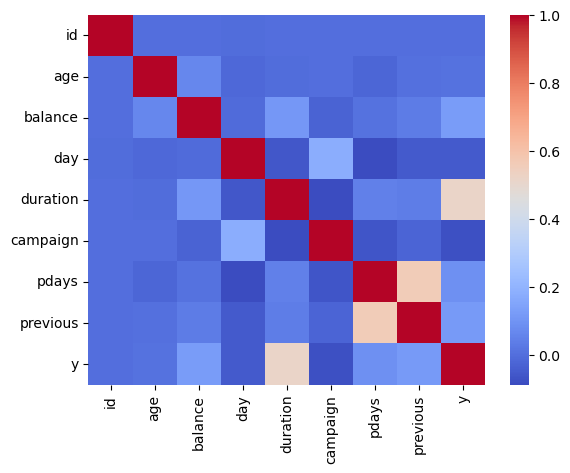


--- Train data correlation with target variable ---


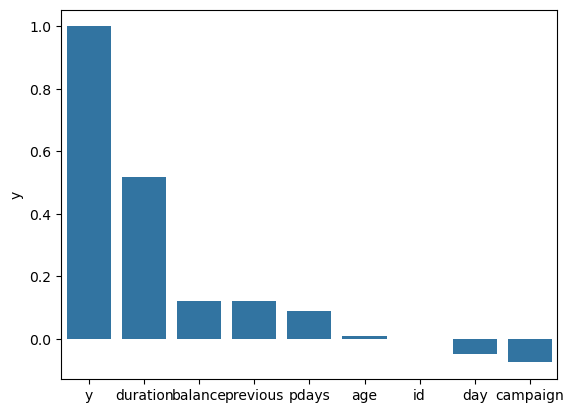


--- Train data numerical variables distribution ---


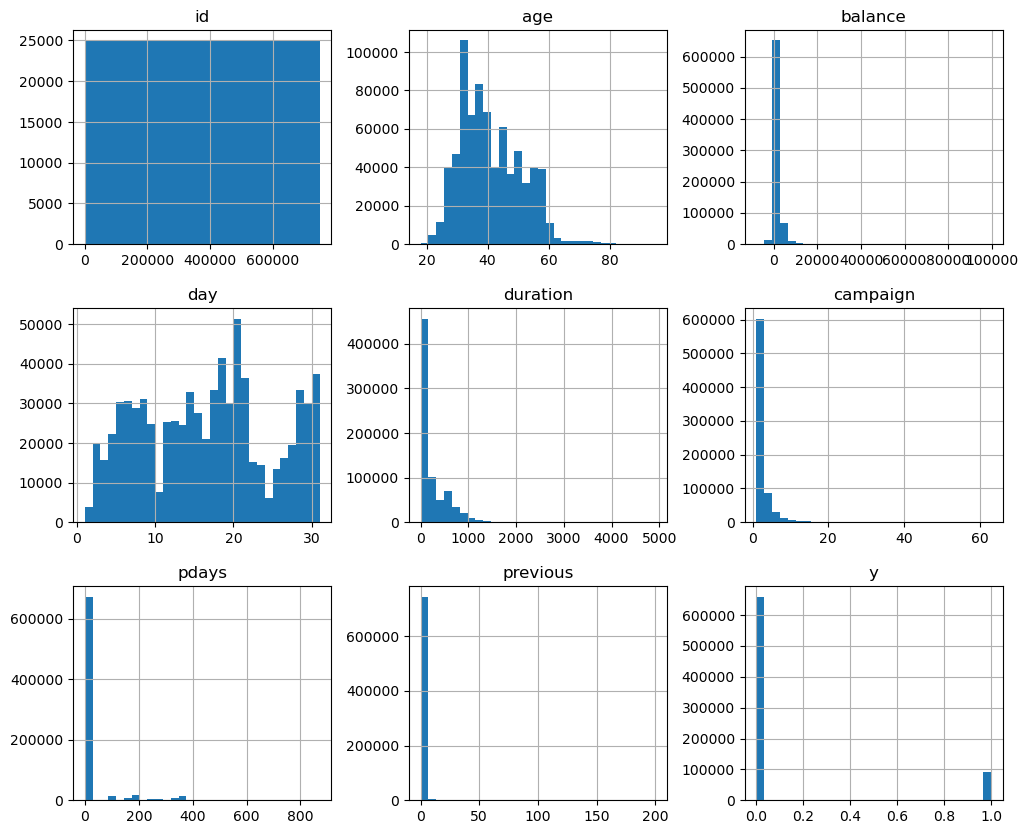


--- Train data box plot for outlier detection ---


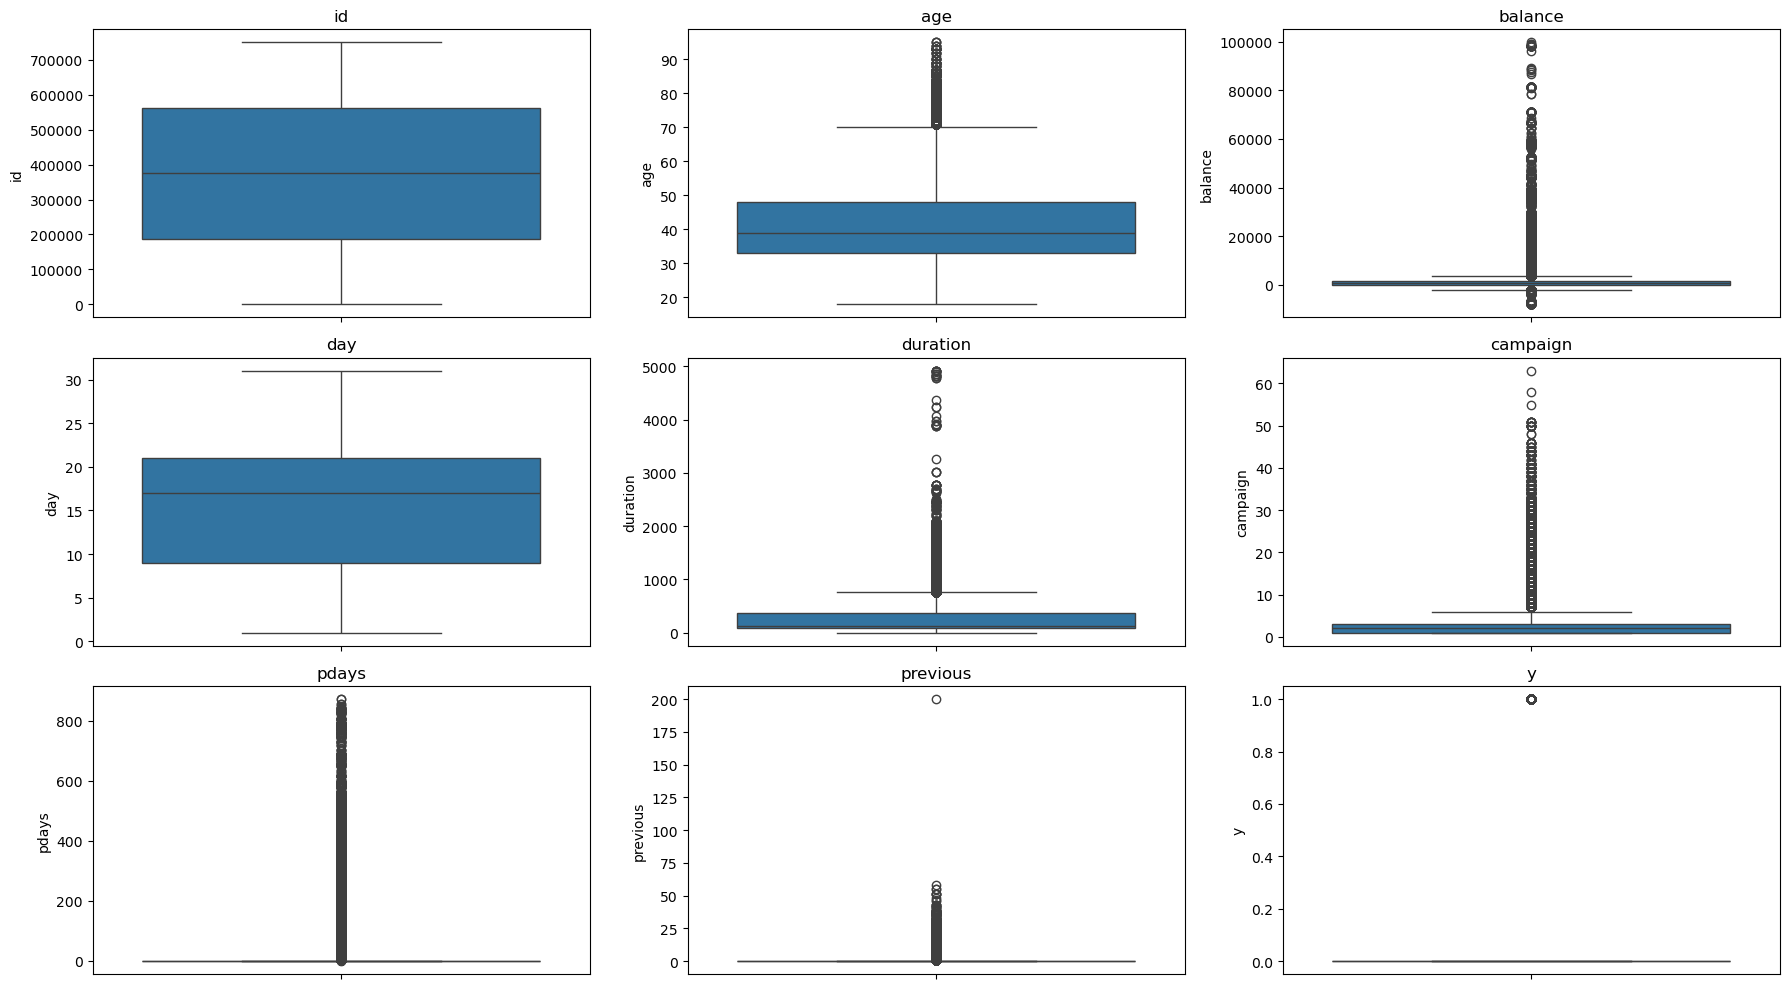


--- Train data distribution plot and values ---


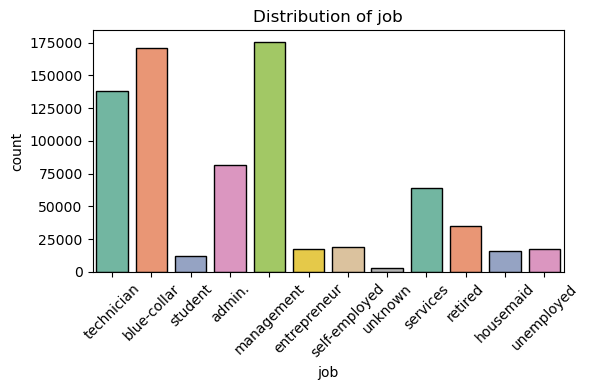

---value count for categorical var job---
job
management       0.234
blue-collar      0.227
technician       0.184
admin.           0.109
services         0.086
retired          0.047
self-employed    0.025
entrepreneur     0.024
unemployed       0.024
housemaid        0.021
student          0.016
unknown          0.004
Name: proportion, dtype: float64 
----------------------------------------


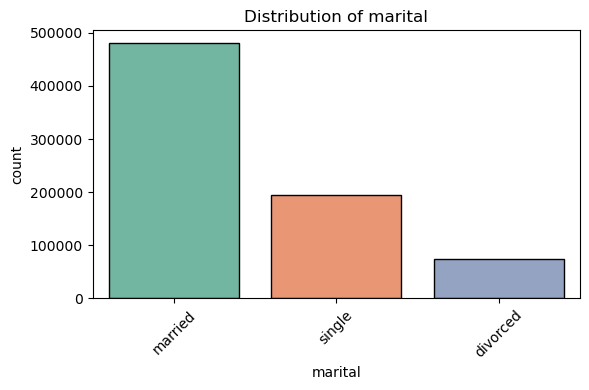

---value count for categorical var marital---
marital
married     0.641
single      0.260
divorced    0.099
Name: proportion, dtype: float64 
----------------------------------------


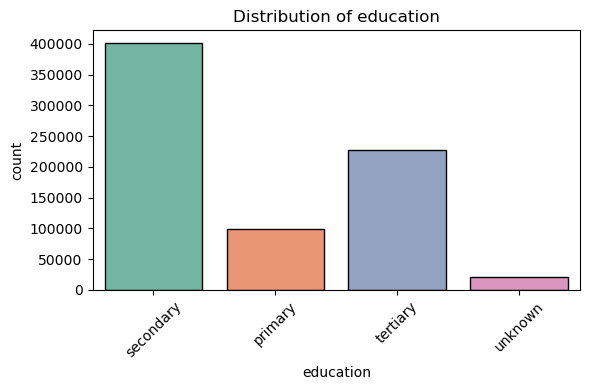

---value count for categorical var education---
education
secondary    0.536
tertiary     0.303
primary      0.133
unknown      0.028
Name: proportion, dtype: float64 
----------------------------------------


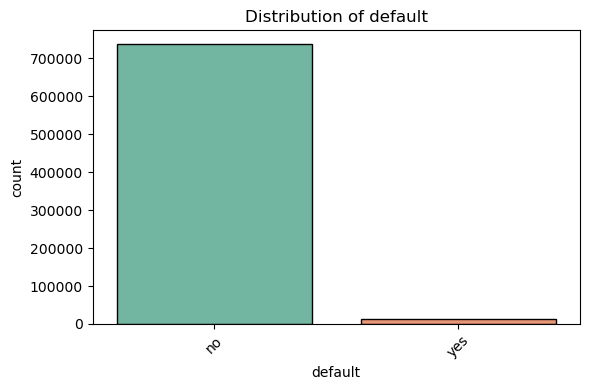

---value count for categorical var default---
default
no     0.983
yes    0.017
Name: proportion, dtype: float64 
----------------------------------------


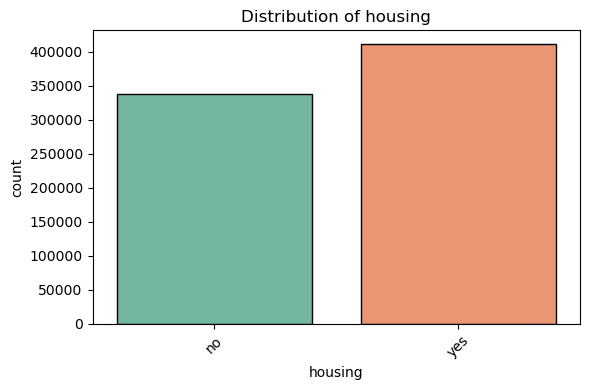

---value count for categorical var housing---
housing
yes    0.548
no     0.452
Name: proportion, dtype: float64 
----------------------------------------


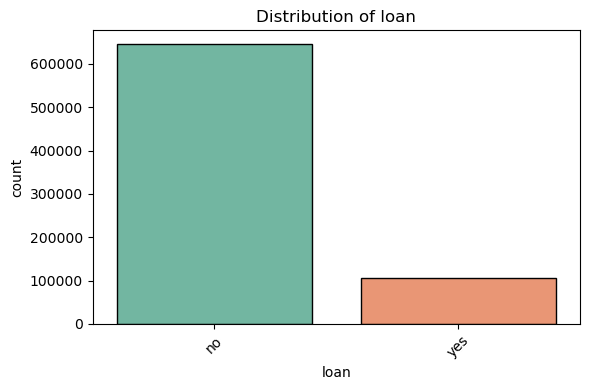

---value count for categorical var loan---
loan
no     0.86
yes    0.14
Name: proportion, dtype: float64 
----------------------------------------


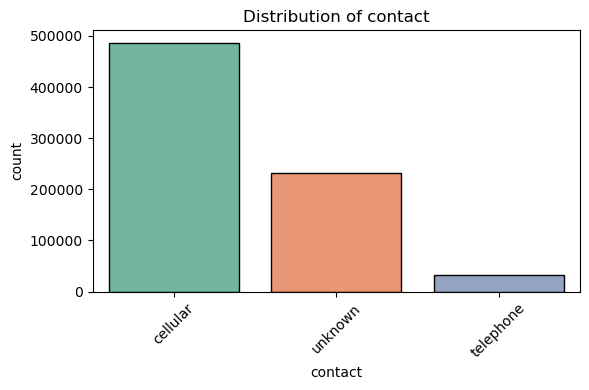

---value count for categorical var contact---
contact
cellular     0.649
unknown      0.309
telephone    0.042
Name: proportion, dtype: float64 
----------------------------------------


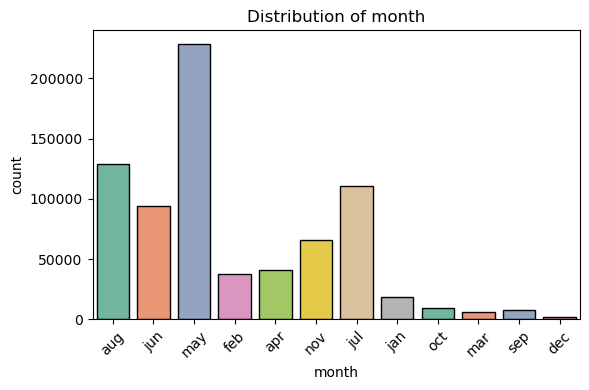

---value count for categorical var month---
month
may    0.305
aug    0.172
jul    0.148
jun    0.125
nov    0.088
apr    0.055
feb    0.050
jan    0.025
oct    0.012
sep    0.010
mar    0.008
dec    0.003
Name: proportion, dtype: float64 
----------------------------------------


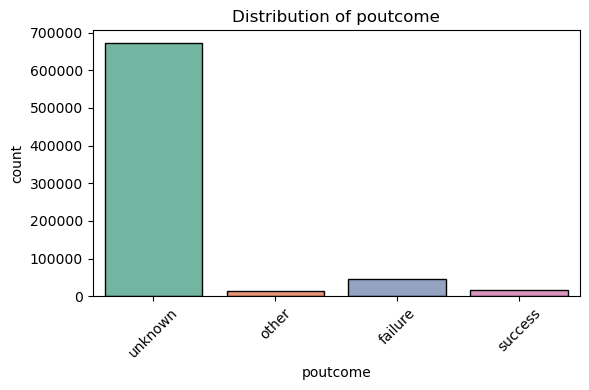

---value count for categorical var poutcome---
poutcome
unknown    0.897
failure    0.060
success    0.024
other      0.020
Name: proportion, dtype: float64 
----------------------------------------


In [253]:
## preprocessing pipeline
print("\n--- First few rows of train data ---")
display(df_train.head())

print("\n--- First few rows of test data ---")
display(df_test.head())

print("\n--- Train data info ---")
display(df_train.info())

print("\n--- Test data info ---")
display(df_test.info())

print('\n--- Train data missing value ---')
display(df_train.isnull().sum())

print('\n--- Test data missing value ---')
display(df_test.isnull().sum())

print('\n--- Train data summary stats ---')
display(df_train.describe().T)

print('\n--- Test data summary stats ---')
display(df_test.describe().T)


## identify categorical columns
print('\n--- Train data categorical column ---')
train_cat_col = [col for col in df_train.columns if df_train[col].dtype == 'object']
print(train_cat_col)
print('\n--- Test data categorical column ---')
test_cat_col = [col for col in df_test.columns if df_test[col].dtype == 'object']
print(test_cat_col)

## indentify numerical columns
train_num_col = [col for col in df_train.columns if df_train[col].dtype in ['int64','float64']]
print('\n--- Train data numerical column ---')
print(train_num_col)
test_num_col = [col for col in df_test.columns if df_test[col].dtype in ['int64','float64']]
print('\n--- Test data numerical column ---')
print(test_num_col)

## check for duplicate rows
print("\n--- Train data Duplicate Rows ---")
print(df_train.duplicated().sum())

print("\n--- Test data Duplicate Rows ---")
print(df_test.duplicated().sum())

## correlation matrix for numerical vars
print("\n--- Train data correlation matrix ---")
sns.heatmap(df_train[train_num_col].corr(), cmap='coolwarm')
plt.show()

print("\n--- Train data correlation with target variable ---")
corr_target = df_train[train_num_col].corr()['y'].sort_values(ascending = False)
sns.barplot(corr_target)
plt.show()

print("\n--- Train data numerical variables distribution ---")
df_train[train_num_col].hist(figsize=(12,10), bins=30)
plt.show()

print("\n--- Train data box plot for outlier detection ---")
plt.figure(figsize=(18, 10))
for i,col in enumerate(train_num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(df_train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

print("\n--- Train data distribution plot and values ---")
for col in train_cat_col:
    plt.figure(figsize=(6,4))
    sns.countplot(data = df_train, x = col, hue = col, palette='Set2', legend=False,
        edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(f'---value count for categorical var {col}---')
    print(df_train[col].value_counts(normalize=True).round(3).sort_values(ascending=False), '\n' + '-'*40)

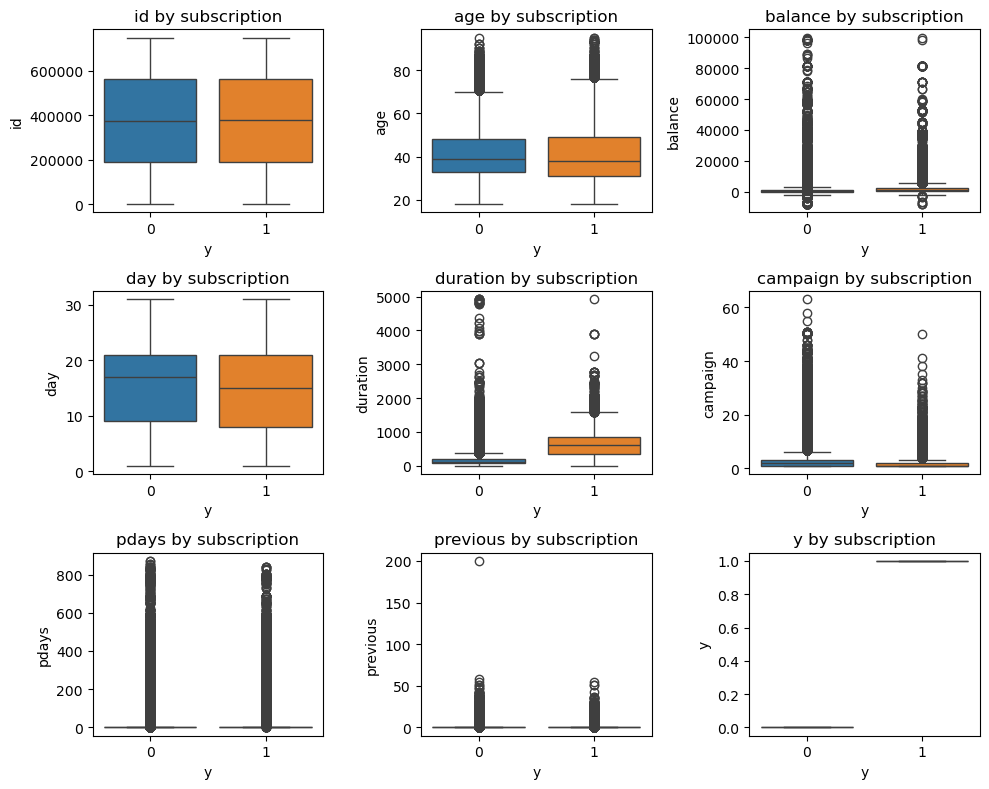

In [254]:
## numerical features by target
plt.figure(figsize=(10,8))
for i,col in enumerate(train_num_col):
    plt.subplot(3,3,i+1)
    sns.boxplot(data = df_train, x = 'y', y = col, hue = 'y', legend = False)
    plt.title(f'{col} by subscription')
    
plt.tight_layout()
plt.show()

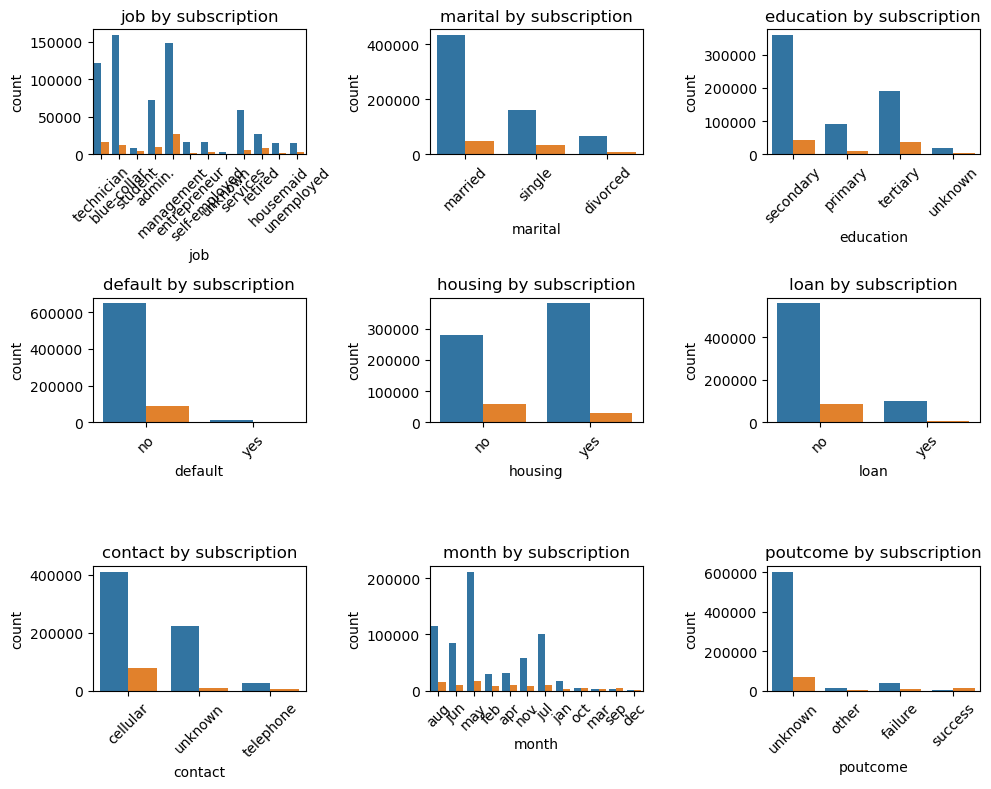

In [248]:
## categorical features by target
plt.figure(figsize=(10,8))
for i,col in enumerate(train_cat_col):
    plt.subplot(3,3,i+1)
    sns.countplot(data = df_train, x = col, hue = 'y', legend = False)
    plt.title(f'{col} by subscription')
    plt.xticks(rotation = 45)
    
plt.tight_layout()
plt.show()

In [260]:
## encoding
binary_map={'yes':1,'no':0}
df_train['loan'] = df_train['loan'].map(binary_map)
df_train['housing'] = df_train['housing'].map(binary_map)
df_train['default'] = df_train['default'].map(binary_map)

df_test['loan'] = df_test['loan'].map(binary_map)
df_test['housing'] = df_test['housing'].map(binary_map)
df_test['default'] = df_test['default'].map(binary_map)

In [261]:
multi_cols = ['job','marital', 'education','contact','month','poutcome']

df_train = pd.get_dummies(data=df_train,columns=multi_cols,drop_first=True)
df_train.head()

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,0,42,0,7,0,0,25,117,3,-1,...,False,False,False,False,False,False,False,False,False,True
1,1,38,0,514,0,0,18,185,1,-1,...,False,True,False,False,False,False,False,False,False,True
2,2,36,0,602,1,0,14,111,2,-1,...,False,False,False,True,False,False,False,False,False,True
3,3,27,0,34,1,0,28,10,2,-1,...,False,False,False,True,False,False,False,False,False,True
4,4,26,0,889,1,0,3,902,1,-1,...,False,False,False,False,False,False,False,False,False,True


In [262]:
df_test = pd.get_dummies(data=df_test,columns=multi_cols,drop_first=True)
df_test.head()

,id,age,default,balance,housing,loan,day,duration,campaign,pdays,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,750000,32,0,1397,1,0,21,224,1,-1,...,False,False,False,True,False,False,False,False,False,True
1,750001,44,0,23,1,0,3,586,2,-1,...,False,False,False,False,False,False,False,False,False,True
2,750002,36,0,46,1,1,13,111,2,-1,...,False,False,False,True,False,False,False,False,False,True
3,750003,58,0,-1380,1,1,29,125,1,-1,...,False,False,False,True,False,False,False,False,False,True
4,750004,28,0,1950,1,0,22,181,1,-1,...,True,False,False,False,False,False,False,False,False,True


In [263]:
## Standardization of Numerical Features
from sklearn.preprocessing import StandardScaler
def standardize_data(df_train, df_test):
    scaler = StandardScaler()
    # fit on train data and transform both train and test data
    scaler.fit(df_train.drop('y', axis = 1))
    train_scaled = scaler.transform(df_train.drop('y', axis = 1))
    test_scaled = scaler.transform(df_train.drop('y', axis = 1))
    
    df_train_scaled = pd.DataFrame(train_scaled,columns=df_train.columns[:-1])
    df_test_scaled = pd.DataFrame(test_scaled,columns=df_test.columns)
    
    return df_train_scaled,df_test_scaled

df_train_scaled,df_test_scaled = standardize_data(df_train, df_test)

In [264]:
# feature target seperation
X = df_train.drop('y', axis=1)
y = df_train['y']

X_scaled = df_train_scaled
y_scaled = df_train['y']

In [265]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y,random_state=42)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y_scaled, test_size=0.2, stratify=y,random_state=42)


In [267]:
from catboost import CatBoostClassifier
from sklearn.metrics import f1_score, roc_auc_score

cat_clf = CatBoostClassifier(allow_writing_files=False,
    verbose=100,
    n_estimators=10000)
cat_clf.fit(X_train, y_train)
y_pred = cat_clf.predict_proba(X_test)[:,1]

print("ROC AUC Score catboost is ", roc_auc_score(y_test,y_pred))

Learning rate set to 0.020139
0:	learn: 0.6574176	total: 55.4ms	remaining: 9m 14s
100:	learn: 0.1888632	total: 3.35s	remaining: 5m 27s
200:	learn: 0.1746350	total: 6.58s	remaining: 5m 20s
300:	learn: 0.1678097	total: 9.79s	remaining: 5m 15s
400:	learn: 0.1639174	total: 13s	remaining: 5m 11s
500:	learn: 0.1613336	total: 16.3s	remaining: 5m 8s
600:	learn: 0.1595811	total: 19.6s	remaining: 5m 5s
700:	learn: 0.1581124	total: 22.9s	remaining: 5m 3s
800:	learn: 0.1568150	total: 26.2s	remaining: 5m 1s
900:	learn: 0.1557462	total: 29.5s	remaining: 4m 57s
1000:	learn: 0.1547976	total: 32.8s	remaining: 4m 54s
1100:	learn: 0.1540520	total: 36s	remaining: 4m 51s
1200:	learn: 0.1532976	total: 39.3s	remaining: 4m 48s
1300:	learn: 0.1526261	total: 42.6s	remaining: 4m 44s
1400:	learn: 0.1520242	total: 45.9s	remaining: 4m 41s
1500:	learn: 0.1514450	total: 49.2s	remaining: 4m 38s
1600:	learn: 0.1509542	total: 52.5s	remaining: 4m 35s
1700:	learn: 0.1505066	total: 55.8s	remaining: 4m 32s
1800:	learn: 0.15

In [268]:
test_pred = cat_clf.predict_proba(df_test)[:,1]

In [269]:
test_pd = pd.read_csv('sample_submission.csv')

In [270]:
test_pd['y'] = test_pred

In [271]:
test_pd.to_csv('submission.csv', index=False)

In [272]:
test_pd.head()

,id,y
0,750000,0.002361
1,750001,0.130619
2,750002,0.000156
3,750003,0.000064
4,750004,0.019534
